In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Random Forest Regression

In [14]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
#Importing dataset
dataset = pd.read_csv('/content/drive/My Drive/CSUF/CPSC 483/HW6/Position_Salaries_poly-1.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [16]:
#Training Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x,y)

RandomForestRegressor(random_state=0)

In [17]:
#Predicting new result
y_pred = regressor.predict(np.array([6.5]).reshape(1,1))
print("Predicted salary: %d\n"% y_pred)

Predicted salary: 158300



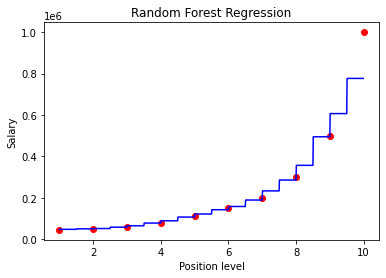

In [18]:
#Visualising Random Forest Regression results
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Decision Tree Regression

In [35]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
#Importing dataset
dataset = pd.read_csv('/content/drive/My Drive/CSUF/CPSC 483/HW6/Position_Salaries_poly-1.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [37]:
#Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

In [38]:
#Predicting a new result
y_pred = regressor.predict([[6.5]])
print("Predicted salary: %d\n"% y_pred)

Predicted salary: 150000



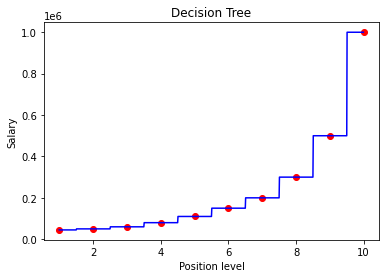

In [40]:
#Visualising the Decision Tree Regression results
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Decision Tree')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Support Vector Regression

In [24]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
#Importing dataset
dataset = pd.read_csv('/content/drive/My Drive/CSUF/CPSC 483/HW6/Position_Salaries_poly-1.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y), 1)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [30]:
#Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [34]:
#Predicting new result
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

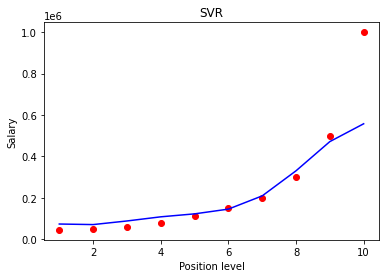

In [32]:
#Visualising SVR results
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

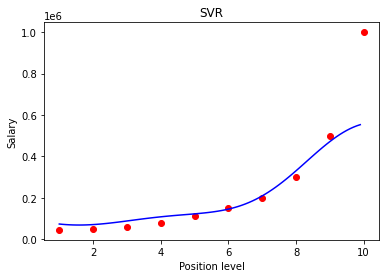

In [33]:
#Visualising SVR results for higher resolution and smoother curve
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()